In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the data

In [2]:
# Reading the dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the shape of the dataset
bike.shape
# There are 730 rows and 16 columns in the dataset

(730, 16)

In [4]:
# statistical summary of the dataframe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Checking the data types
bike.info()
# There are no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking for missing values
bike.isnull().sum()
# There are no missing values in the dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Checking for duplicate values
bike.duplicated().sum()
# There are no duplicate values in the dataset

0

### Data Preparation

In [8]:
# Data Cleaning
# Dropping the 'instant' column as it is just a serial number
bike.drop('instant', axis=1, inplace=True)
# Dropping the 'dteday' column as we already have 'yr' and 'mnth' columns
bike.drop('dteday', axis=1, inplace=True)
# Dropping the 'casual' and 'registered' columns as we have 'cnt' column which is the sum of these two columns
bike.drop(['casual', 'registered'], axis=1, inplace=True)

In [9]:
# Renaming the columns
bike.rename(columns={'yr':'year', 'mnth':'month', 'weathersit':'weather_condition', 'hum':'humidity', 'cnt':'count'}, inplace=True)

In [10]:
# Mapping the values of 'season' column
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Mapping the values of 'month' column
bike['month'] = bike['month'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
# Mapping the values of 'weekday' column
bike['weekday'] = bike['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})
# Mapping the values of 'weather_condition' column
bike['weather_condition'] = bike['weather_condition'].map({1:'clear', 2:'mist', 3:'light_rain', 4:'heavy_rain'})
# Mapping the values of 'year' column
bike['year'] = bike['year'].map({0:'2018', 1:'2019'})

In [11]:
# Converting the 'year', 'month','weekday'  columns to categorical
bike['year'] = bike['year'].astype('category')
bike['month'] = bike['month'].astype('category')
bike['weekday'] = bike['weekday'].astype('category')

In [12]:
# Checking the dataframe after cleaning
bike.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,count
0,spring,2018,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Data Visualisation
### Univariate analysis


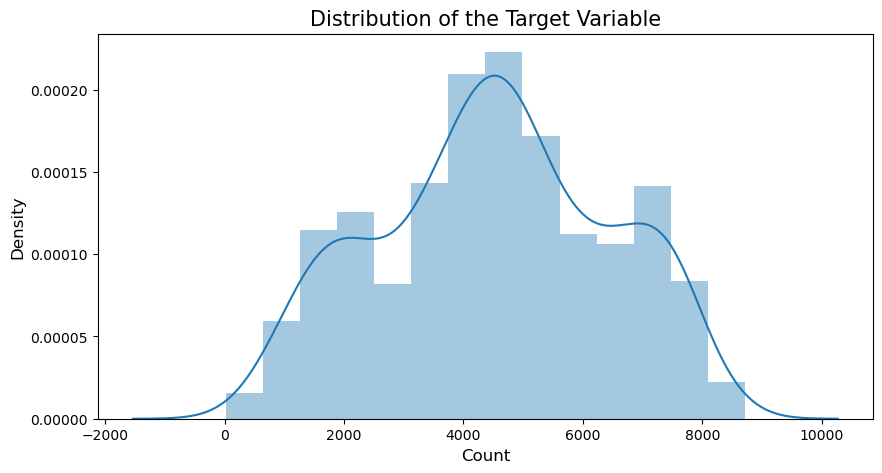

In [13]:
# Data Visualization
# Visualizing the distribution of the target variable
plt.figure(figsize=(10,5))
sns.distplot(bike['count'])
plt.title('Distribution of the Target Variable', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()
# The distribution of the target variable is normal

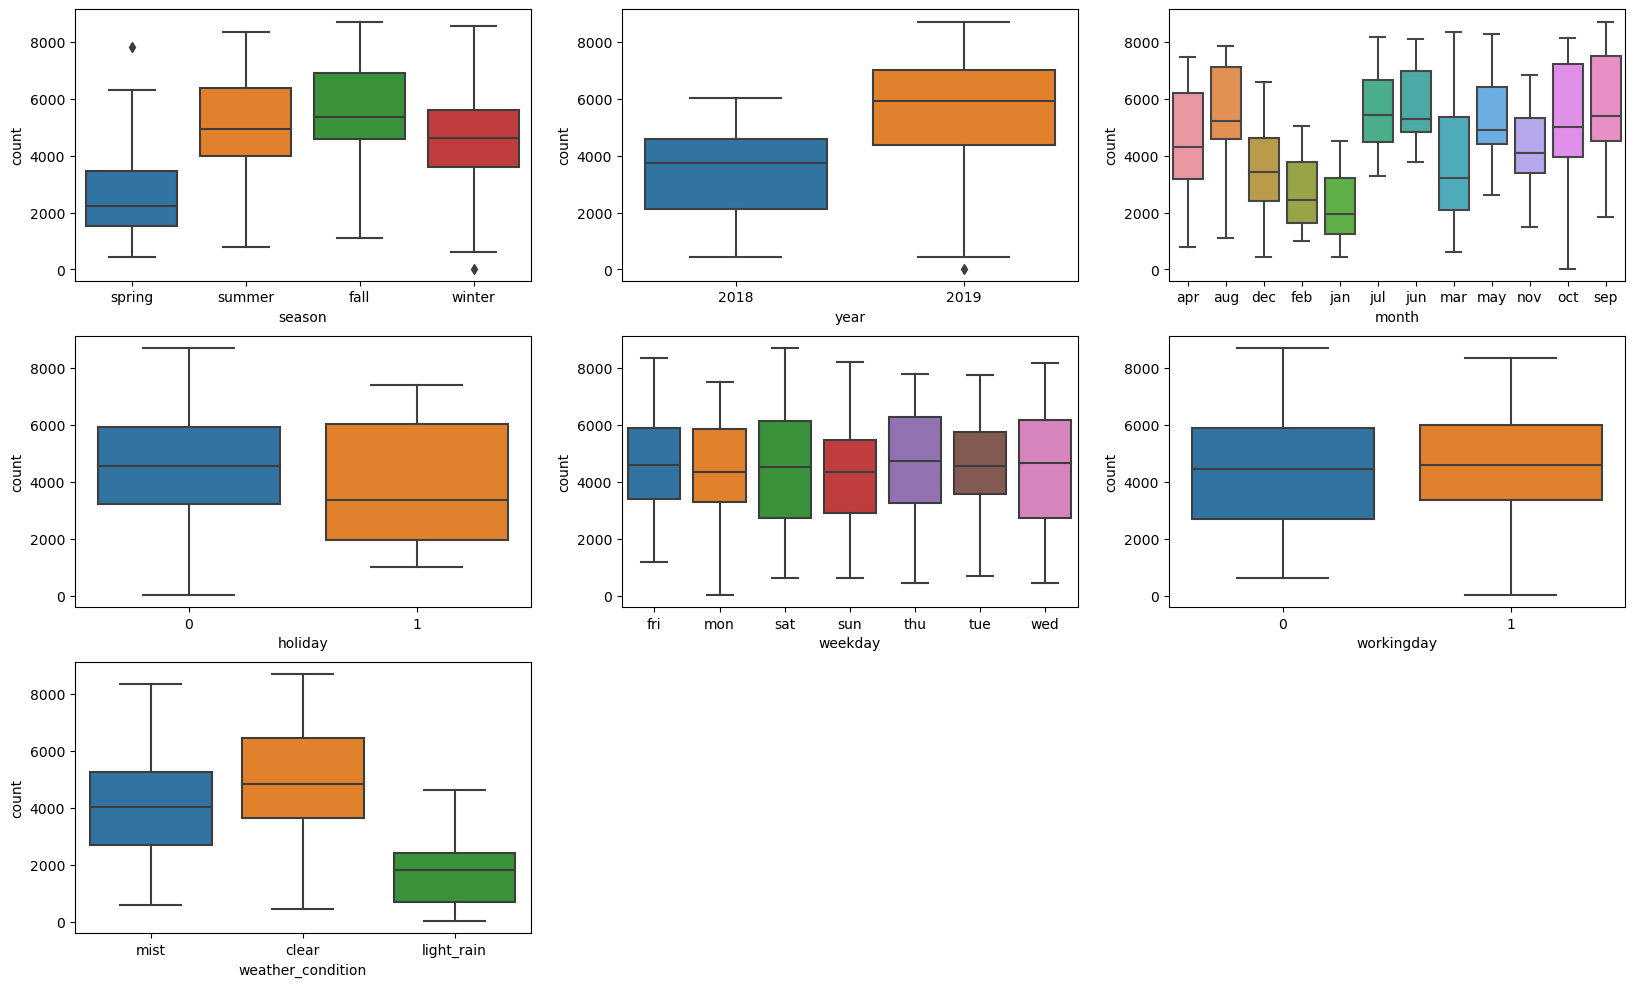

In [14]:
# Visualizing the distribution of the target variable 'count' with respect to the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weather_condition', y = 'count', data = bike)
plt.show()

#### Inference:
1. The demand for rental bikes is high in summer and fall seasons and less in spring season
2. The demand for rental bikes is high in the year 2019 increased significantly from the year 2018.
3. The demand for rental bikes is high in the months of June, July and August.
4. Bike demand is less in holidays compared to working days
5. The demand for rental bikes is high when the weather condition is clear, however demand is less in case of lightsnow and light rainfall
6. The demand for rental bikes remains more or less similar throughout the weekdays

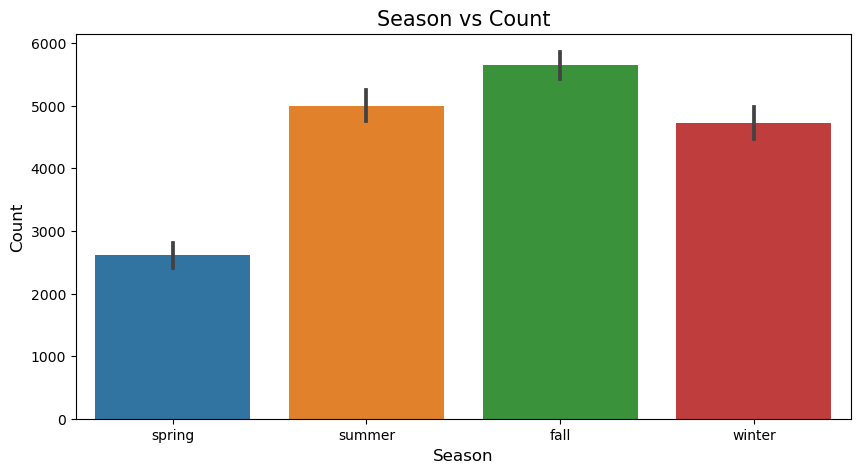

In [15]:
# Univariate analysis 
# barplot between season and count
plt.figure(figsize=(10,5))
sns.barplot(x = 'season', y = 'count', data = bike)
plt.title('Season vs Count', fontsize=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
# Inference: The count is highest in fall season and lowest in spring season

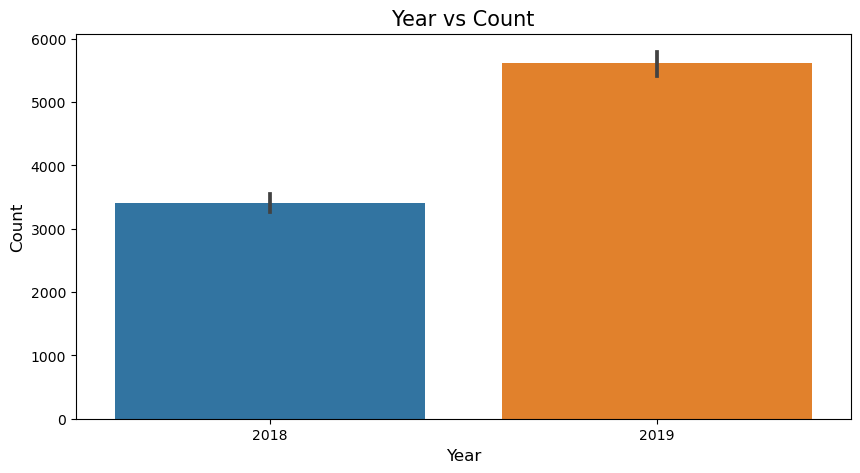

In [16]:
# barplot between year and count
plt.figure(figsize=(10,5))
sns.barplot(x = 'year', y = 'count', data = bike)
plt.title('Year vs Count', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
# Inference: The count is highest in 2019 and lowest in 2018

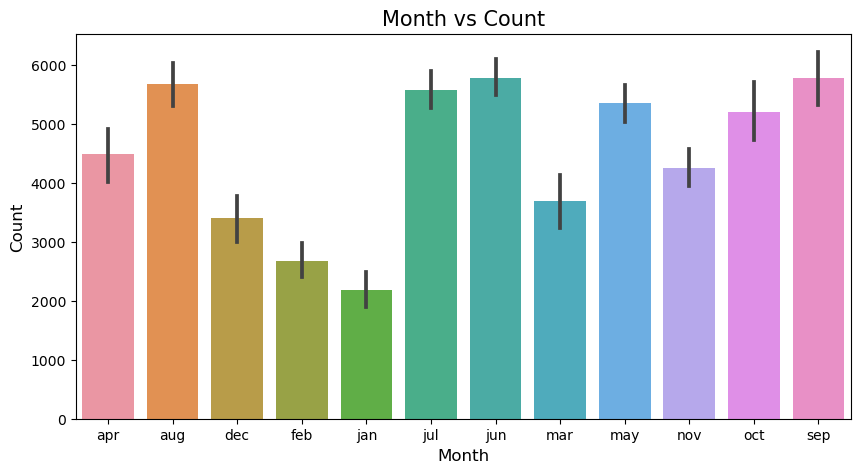

In [17]:
# barplot between month and count
plt.figure(figsize=(10,5))
sns.barplot(x = 'month', y = 'count', data = bike)
plt.title('Month vs Count', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
# Inference: The count is highest in June and lowest in January

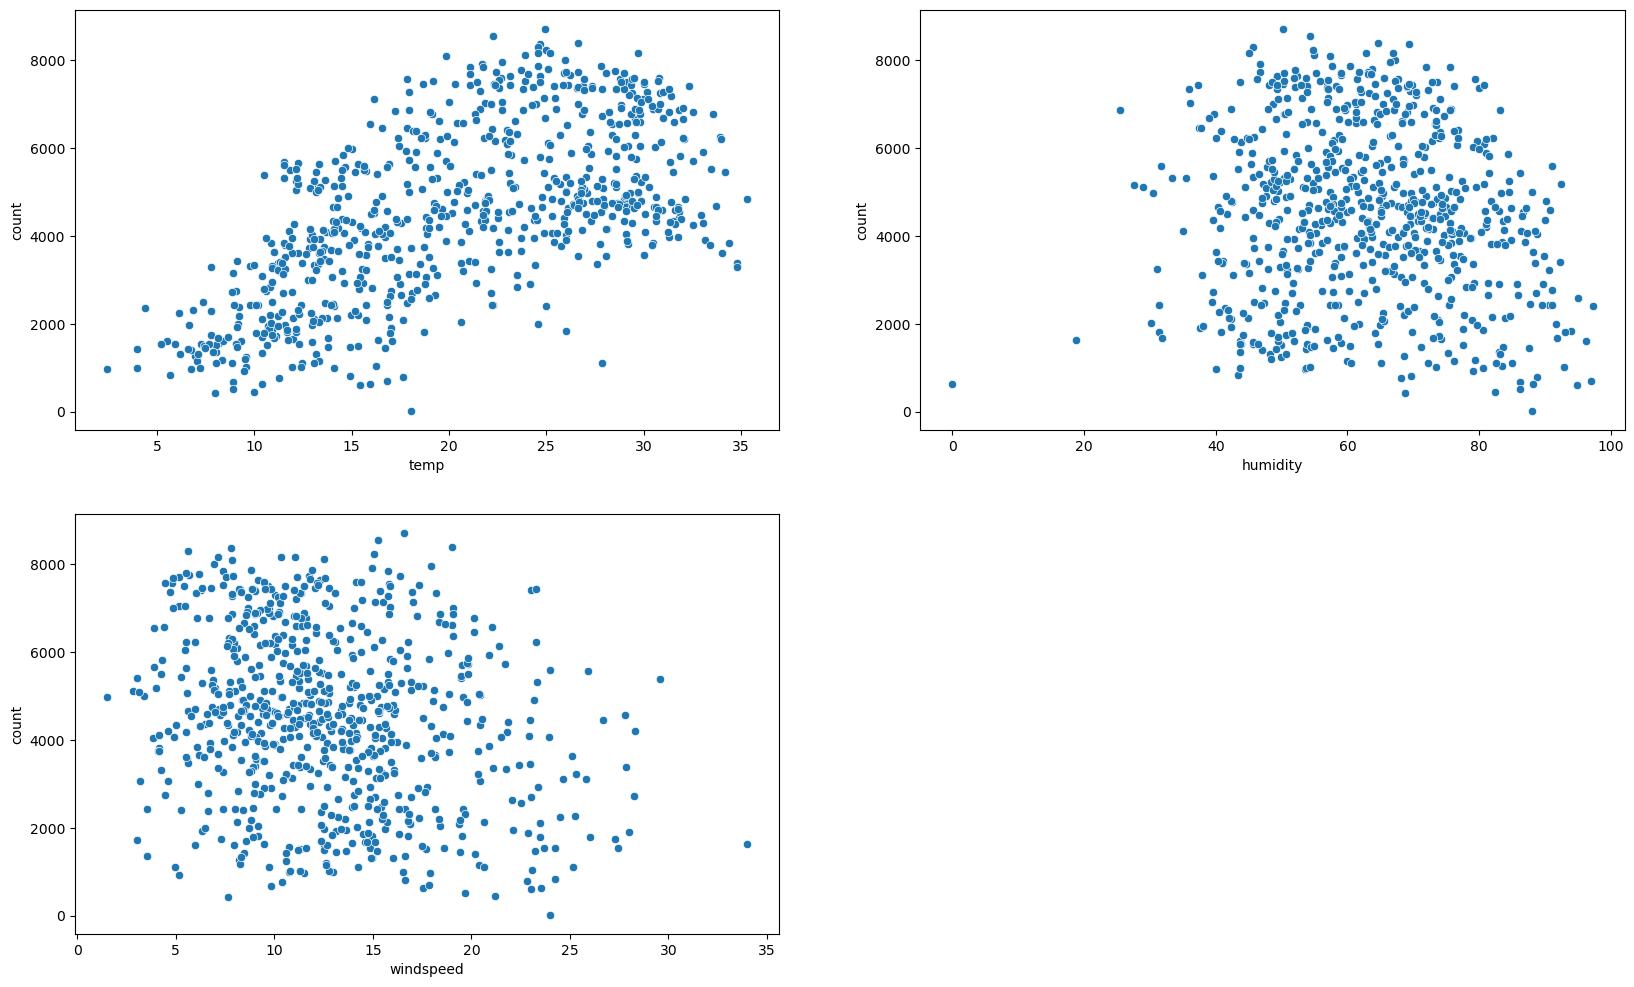

In [18]:
# Visualizing the distribution of the target variable 'count' with respect to the numerical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.scatterplot(x = 'temp', y = 'count', data = bike)
plt.subplot(2,2,2)
sns.scatterplot(x = 'humidity', y = 'count', data = bike)
plt.subplot(2,2,3)
sns.scatterplot(x = 'windspeed', y = 'count', data = bike)
plt.show()
# Inference:
# 1. The count increases with increase in temperature
# 2. The count decreases with increase in humidity
# 3. The count is not affected by the windspeed


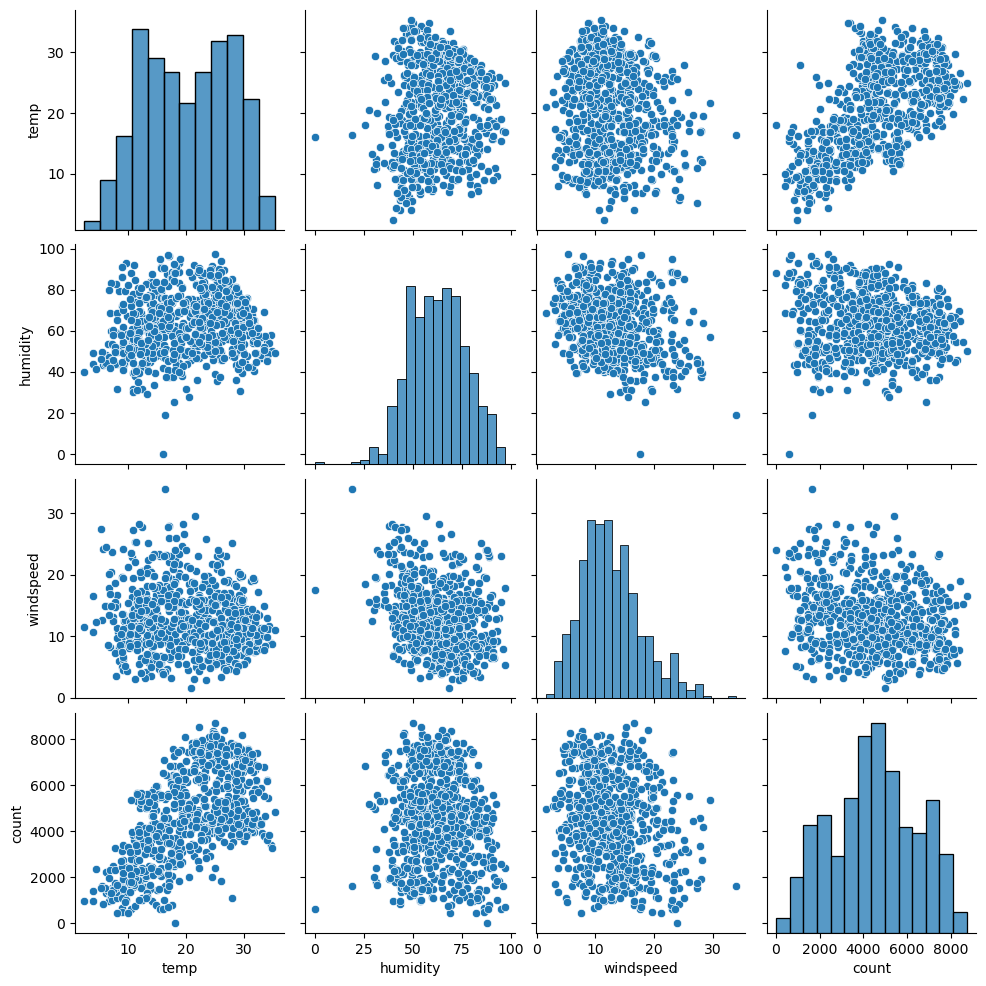

In [19]:
# Visualizing the distribution of the continuous variables
sns.pairplot(bike[['temp', 'humidity', 'windspeed', 'count']])
plt.show()
# From the above pairplot, we can see that there is a linear relationship between 'temp' and 'count'
# Bike rentals are high when the temperature is high
# Bike rentals 
# highest correlation is between 'temp' and 'count'

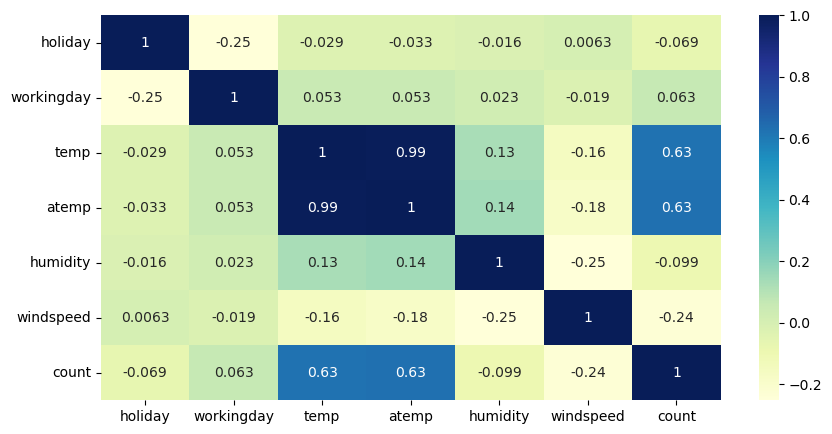

In [20]:
# Visualizing the correlation between the numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()
# Inference:
# 1. 'temp' and 'count' are highly correlated with each other.
# 2. 'humidity' and 'count' are negatively correlated with each other.
# 3. 'windspeed' and 'count' are not correlated with each other.

#### Inference:
1. 'temp' and 'count' are highly correlated with each other.
2. 'humidity' and 'count' are negatively correlated with each other.
3. 'windspeed' and 'count' are not correlated with each other.

## Step 3: Training the Model
### Creating Dummy variables

In [21]:
# dummy variables
# Creating dummy variables for the categorical variables
# drop_first=True: to drop the first column of each categorical variable. It is done to avoid the dummy variable trap.
season = pd.get_dummies(bike['season'], drop_first=True)
year = pd.get_dummies(bike['year'], drop_first=True)
month = pd.get_dummies(bike['month'], drop_first=True)
weekday = pd.get_dummies(bike['weekday'], drop_first=True)
weather_condition = pd.get_dummies(bike['weather_condition'], drop_first=True)
# Concatenating the dummy variables to the dataframe
bike = pd.concat([bike, season, year, month, weekday, weather_condition], axis=1)
# Dropping the original categorical variables
bike.drop(['season', 'year', 'month', 'weekday', 'weather_condition'], axis=1, inplace=True)
bike.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
bike.shape

(730, 30)

### Test train data split

In [23]:
# Splitting the dataframe into train and test sets
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

### Scaling using minmax scaler

In [24]:
# Rescaling the features
scaler = MinMaxScaler()
num_vars = ['temp', 'humidity', 'windspeed', 'count','atemp']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


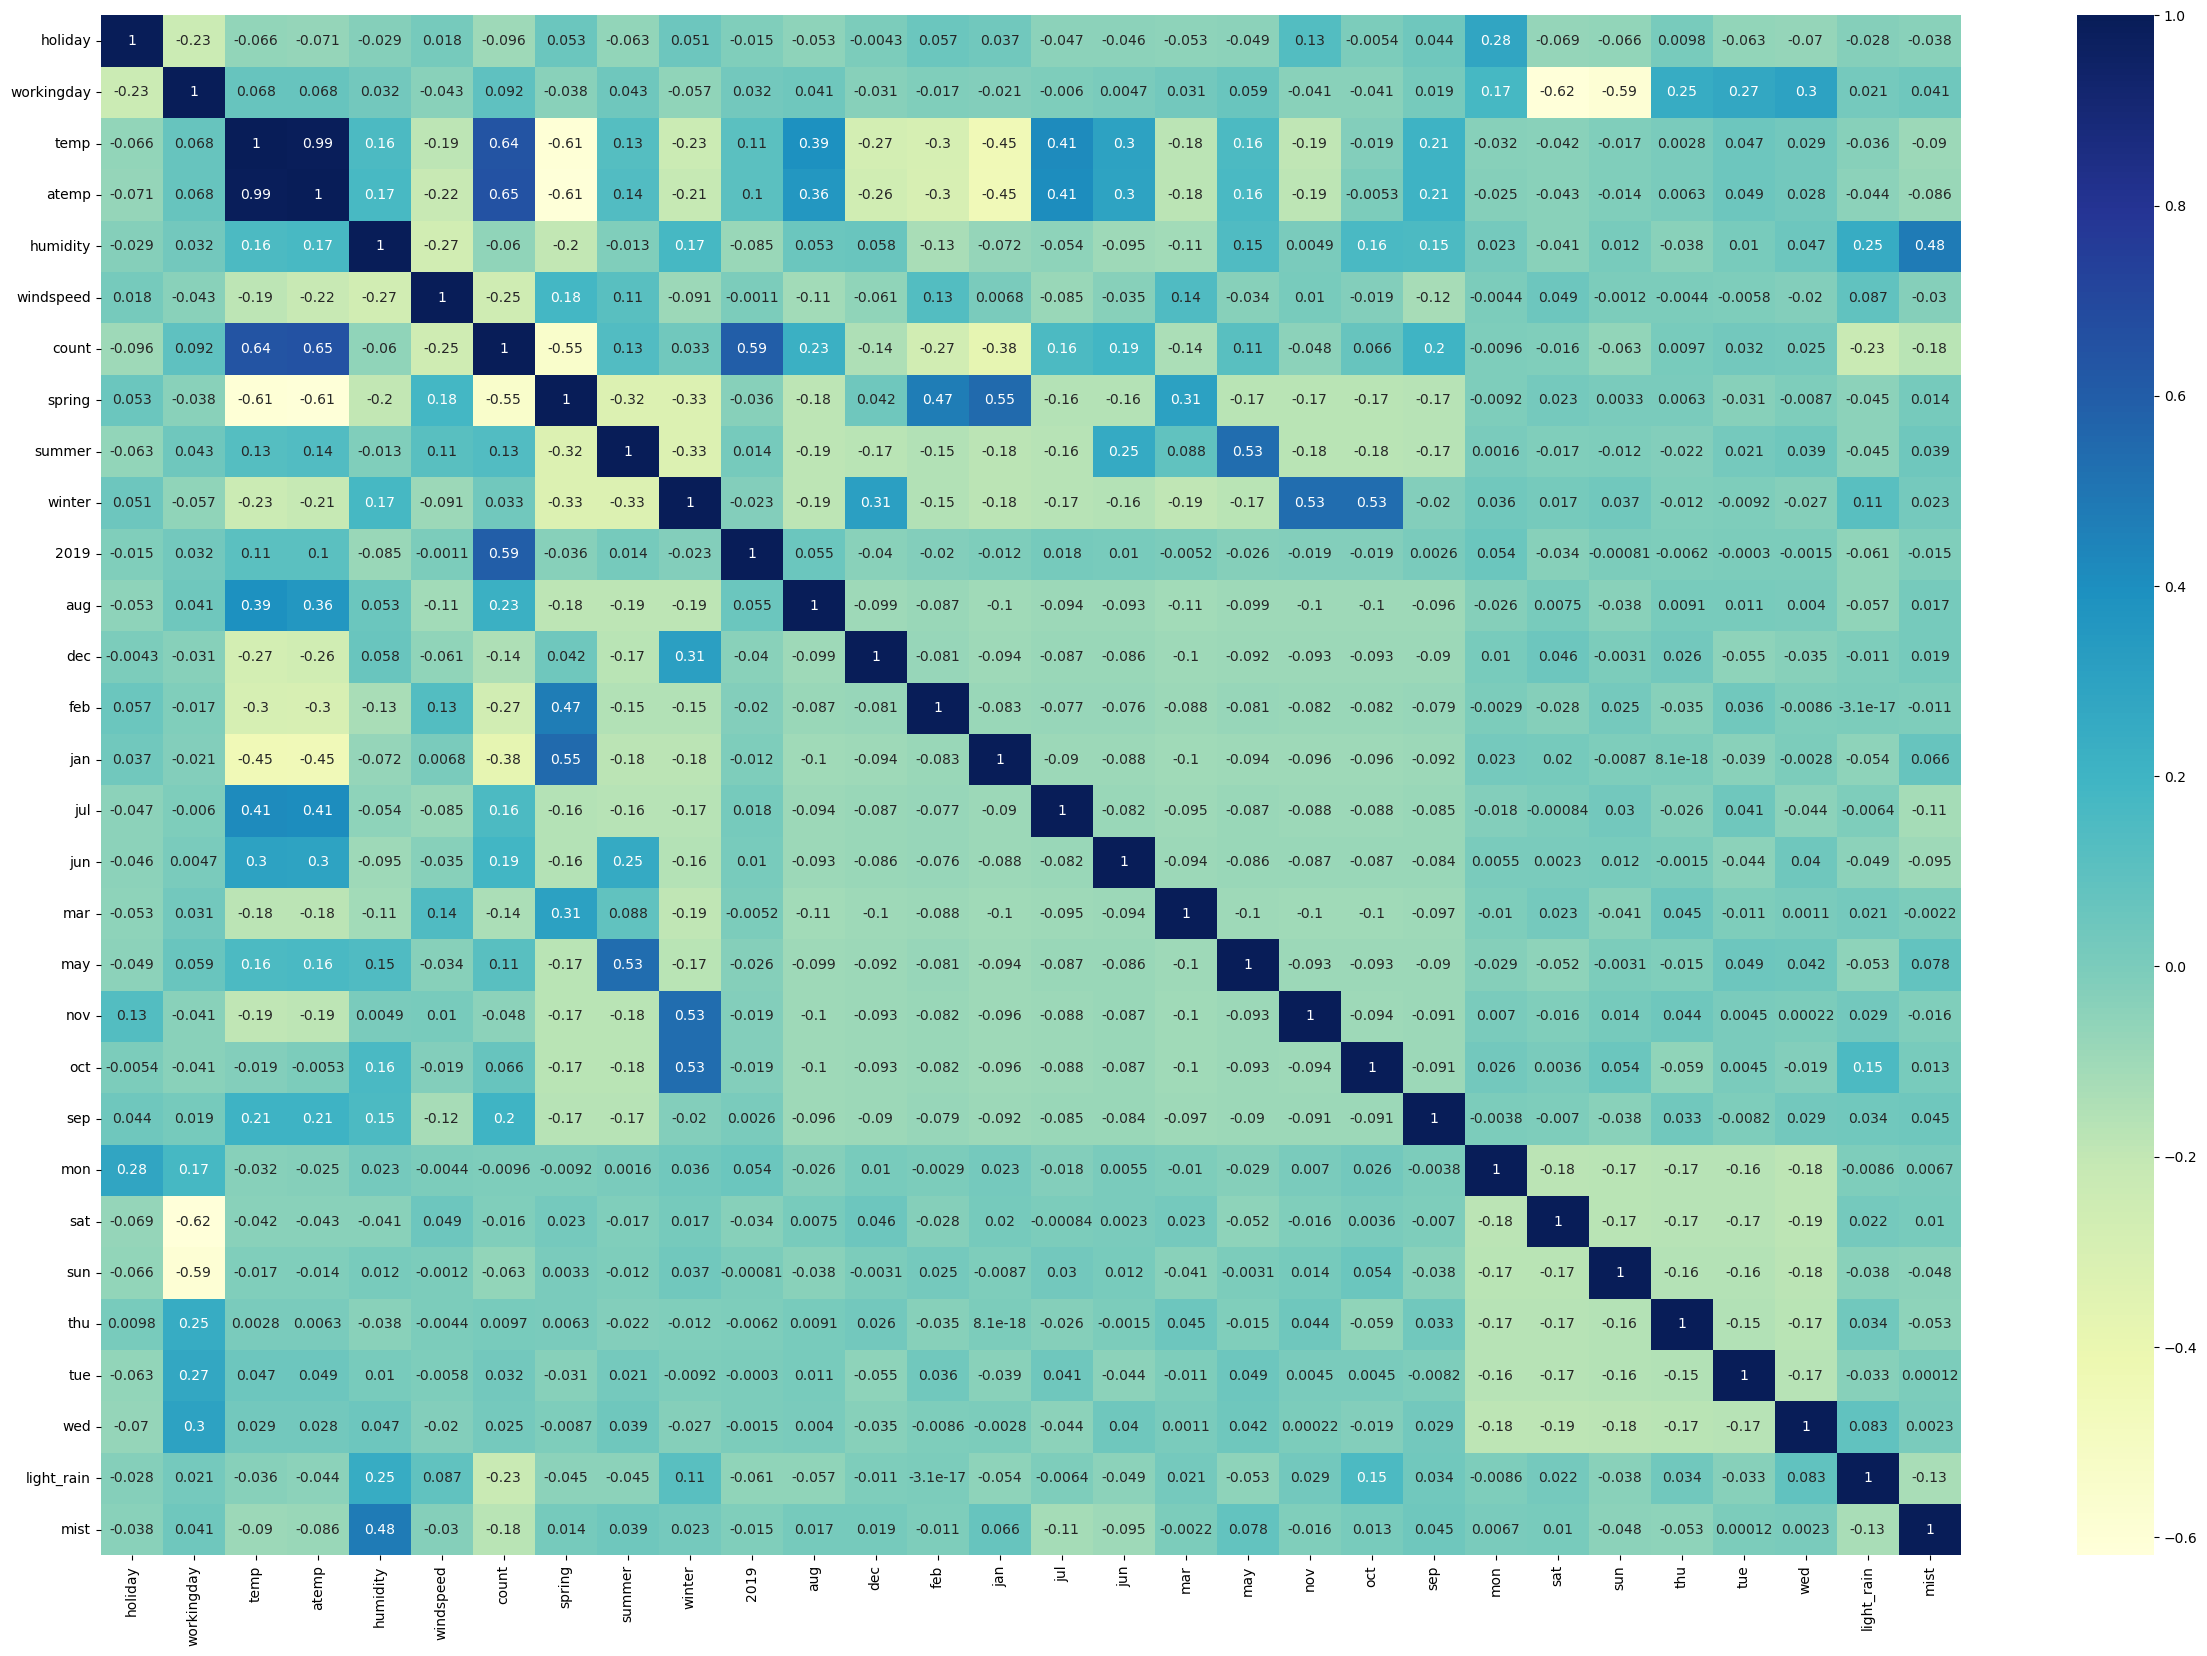

In [25]:
# let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(30, 20))
sns.heatmap(bike_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Inference:
1. 'temp' and 'atemp' are highly correlated with each other.
2. 'humidity' and 'count' are negatively correlated with each other.
3. Count is highly correlated with 'temp', 'atemp','2019'
4. count and spring are not correlated with each other.

In [26]:
# Dividing into X and y sets for the model building
y_train = bike_train.pop('count')
X_train = bike_train

### Feature Selection
1. Perform hybrid model (Automated & Manual)
2. Use RFE to perform automated feature selection

In [27]:
#  Implementing RFE to select 15 features
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
# Inference: The RFE has selected 20 features
# False indicates that the particular feature is not selected by RFE
# True indicates that the particular feature is selected by RFE

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('aug', False, 3),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 9),
 ('mar', False, 10),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 7),
 ('tue', False, 5),
 ('wed', False, 8),
 ('light_rain', True, 1),
 ('mist', True, 1)]

### Perform manual feature selection using statsmodel library
#### Drop the insignificant variables and build the model recursively

In [29]:
# Creating a dataframe with the columns and their respective RFE rankings
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
col

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', '2019', 'dec', 'feb', 'jan', 'jul', 'nov',
       'sep', 'sat', 'sun', 'light_rain', 'mist'],
      dtype='object')

In [30]:
# Building the model
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)
# Creating a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Checking the parameters obtained
lr.params

const         0.239722
holiday      -0.002063
workingday    0.092092
temp          0.442226
atemp         0.018631
humidity     -0.145821
windspeed    -0.188006
spring       -0.052216
summer        0.037307
winter        0.103013
2019          0.231128
dec          -0.049169
feb          -0.033925
jan          -0.063915
jul          -0.051876
nov          -0.046570
sep           0.071606
sat           0.101958
sun           0.047735
light_rain   -0.258090
mist         -0.060002
dtype: float64

In [31]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())
# Inference:
# 1. The R-squared value is 0.852 which is good.
# 2. The p-values of certain variables are high. So, we need to drop those variables.

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.47e-189
Time:                        13:26:47   Log-Likelihood:                 525.16
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2397      0.030      8.111      0.0

In [32]:
# Checking the VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Inference:
# 1. Humidity has the highest VIF value of 29.40

,Features,VIF
2,temp,59.16
1,workingday,58.41
3,atemp,53.88
16,sat,13.95
17,sun,13.36
6,spring,5.79
8,winter,3.98
0,holiday,3.33
7,summer,2.93
12,jan,2.37


- Holiday column as it has high p-value, drop it and build model

In [33]:
# Drop holiday column as it has high p-value
X= X_train_rfe.drop('holiday', axis=1)

In [34]:
# Perform linear regression again
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
# Checking the parameters obtained
lr.summary()
# Inference:
# 1. No change in the R-squared and adjusted R-squared values
# 2. The p-values of all the variables are less than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.47e-189
Time:                        13:26:47   Log-Likelihood:                 525.16
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2377      0.045      5.330      0.000       0.150       0.325
workingday     0.0942      0.025      3.710      0.000       0.044       0.144
temp           0.4422      0.133      3.323      0.001       0.181       0.704
atemp          0.0186      0.135      0.138      0.890      -0.247       0.284
humidity      -0.1458      0.037     -3.902      0.000      -0.219      -0.072
windspeed     -0.1880      0.026     -7.267      0.000      -0.239      -0.137
spring        -0.0522      0.022     -2.384      0.018      -0.095      -0.009
summer         0.0373      0.016      2.404      0.017       0.007       0.068
winter         0.1030      0.018      5.720      0.000       0.068       0.138
2019           0.2311      0.008     29.052      0.000       0.215       0.247
dec           -0.0492      0.018     -2.725      0.007      -0.085      -0.014
feb           -0.0339      0.021     -1.588      0.113      -0.076       0.008
jan           -0.0639      0.021     -3.017      0.003      -0.106      -0.022
jul           -0.0519      0.018     -2.883      0.004      -0.087      -0.017
nov           -0.0466      0.019     -2.497      0.013      -0.083      -0.010
sep            0.0716      0.017      4.297      0.000       0.039       0.104
sat            0.1040      0.027      3.875      0.000       0.051       0.157
sun            0.0498      0.027      1.848      0.065      -0.003       0.103
light_rain    -0.2581      0.026     -9.880      0.000      -0.309      -0.207
mist          -0.0600      0.010     -5.801      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       81.677   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.847
Skew:                          -0.789   Prob(JB):                     1.82e-48
Kurtosis:                       5.803   Cond. No.                         86.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Checking the VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Inference:
# 1. VIF for temp, atemp, humidity, workingday is greater than 10

,Features,VIF
1,temp,379.07
2,atemp,367.98
3,humidity,34.73
0,workingday,18.92
5,spring,6.15
4,windspeed,5.24
15,sat,5.04
16,sun,4.85
7,winter,4.55
6,summer,3.21


- atemp column is highly correlated with temp. It's causing multi-collinearity and also having high p-value, drop it and build model again

In [36]:
# Drop atemp column as it has high p-value and higly correlated with temp
X= X.drop('atemp', axis=1)

In [37]:
# Perform linear regression again
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
# Checking the parameters obtained
lr.summary()
# Inference:
# 1. No change in the R-squared and adjusted R-squared values
# 2. The p-values of certain variables are high. So, we need to drop those variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.55e-190
Time:                        13:26:47   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2374      0.044      5.335      0.000       0.150       0.325
workingday     0.0943      0.025      3.722      0.000       0.045       0.144
temp           0.4598      0.038     12.233      0.000       0.386       0.534
humidity      -0.1456      0.037     -3.904      0.000      -0.219      -0.072
windspeed     -0.1887      0.025     -7.440      0.000      -0.239      -0.139
spring        -0.0518      0.022     -2.390      0.017      -0.094      -0.009
summer         0.0377      0.015      2.483      0.013       0.008       0.068
winter         0.1035      0.018      5.852      0.000       0.069       0.138
2019           0.2311      0.008     29.082      0.000       0.215       0.247
dec           -0.0491      0.018     -2.727      0.007      -0.085      -0.014
feb           -0.0339      0.021     -1.591      0.112      -0.076       0.008
jan           -0.0640      0.021     -3.025      0.003      -0.106      -0.022
jul           -0.0517      0.018     -2.883      0.004      -0.087      -0.016
nov           -0.0465      0.019     -2.499      0.013      -0.083      -0.010
sep            0.0718      0.017      4.319      0.000       0.039       0.104
sat            0.1042      0.027      3.886      0.000       0.051       0.157
sun            0.0499      0.027      1.857      0.064      -0.003       0.103
light_rain    -0.2583      0.026     -9.924      0.000      -0.309      -0.207
mist          -0.0600      0.010     -5.813      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       81.478   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.245
Skew:                          -0.787   Prob(JB):                     2.46e-48
Kurtosis:                       5.800   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Checking the VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Inference:
# 1. VIF for temp, workingday is greater than 5
# 2. Drop temp as it has the highest VIF value

,Features,VIF
2,humidity,34.69
1,temp,22.29
0,workingday,18.92
4,spring,6.05
14,sat,5.04
3,windspeed,4.99
15,sun,4.85
6,winter,4.40
5,summer,3.09
10,jan,2.42


- feb feature is having high p-value, drop it and build model again

In [39]:
# drop feb column as it has high p-value
X= X.drop('feb', axis=1)

In [40]:
# Perform linear regression again
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
# Checking the parameters obtained
lr.summary()
# Inference:
# 1. Slight change in the R-squared and adjusted R-squared values
# 2. The p-values of all the variables are less than 0.05 except sunday

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          9.55e-191
Time:                        13:26:47   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2239      0.044      5.118      0.000       0.138       0.310
workingday     0.0966      0.025      3.812      0.000       0.047       0.146
temp           0.4750      0.036     13.038      0.000       0.403       0.547
humidity      -0.1474      0.037     -3.949      0.000      -0.221      -0.074
windspeed     -0.1876      0.025     -7.388      0.000      -0.237      -0.138
spring        -0.0611      0.021     -2.925      0.004      -0.102      -0.020
summer         0.0409      0.015      2.708      0.007       0.011       0.071
winter         0.1052      0.018      5.949      0.000       0.070       0.140
2019           0.2308      0.008     29.005      0.000       0.215       0.246
dec           -0.0405      0.017     -2.351      0.019      -0.074      -0.007
jan           -0.0458      0.018     -2.570      0.010      -0.081      -0.011
jul           -0.0526      0.018     -2.932      0.004      -0.088      -0.017
nov           -0.0420      0.018     -2.277      0.023      -0.078      -0.006
sep            0.0732      0.017      4.404      0.000       0.041       0.106
sat            0.1070      0.027      3.997      0.000       0.054       0.160
sun            0.0520      0.027      1.933      0.054      -0.001       0.105
light_rain    -0.2571      0.026     -9.865      0.000      -0.308      -0.206
mist          -0.0598      0.010     -5.781      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       76.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.539
Skew:                          -0.747   Prob(JB):                     2.33e-45
Kurtosis:                       5.727   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Checking the VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Inference:
# 1. VIF for temp, workingday, humidity is greater than 10

,Features,VIF
2,humidity,34.24
1,temp,21.56
0,workingday,18.83
4,spring,5.06
13,sat,5.03
3,windspeed,4.98
14,sun,4.83
6,winter,4.40
5,summer,3.08
16,mist,2.34


- Humidity feature has high VIF, drop it and build model again

In [42]:
# Drop humidity as it is insignificant with high VIF
X = X.drop('humidity', axis=1)

In [43]:
# Perform linear regression again
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
# Checking the parameters obtained
lr.summary()
# Inference:
# 1. Slight change in the R-squared and adjusted R-squared values
# 2. The p-values of all the variables are less than 0.05 except sunday

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.49e-188
Time:                        13:26:48   Log-Likelihood:                 515.89
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1556      0.041      3.817      0.000       0.076       0.236
workingday     0.0974      0.026      3.788      0.000       0.047       0.148
temp           0.4360      0.036     12.254      0.000       0.366       0.506
windspeed     -0.1604      0.025     -6.467      0.000      -0.209      -0.112
spring        -0.0701      0.021     -3.327      0.001      -0.112      -0.029
summer         0.0340      0.015      2.237      0.026       0.004       0.064
winter         0.0917      0.018      5.212      0.000       0.057       0.126
2019           0.2345      0.008     29.241      0.000       0.219       0.250
dec           -0.0474      0.017     -2.731      0.007      -0.082      -0.013
jan           -0.0520      0.018     -2.882      0.004      -0.087      -0.017
jul           -0.0478      0.018     -2.630      0.009      -0.083      -0.012
nov           -0.0429      0.019     -2.291      0.022      -0.080      -0.006
sep            0.0669      0.017      3.989      0.000       0.034       0.100
sat            0.1096      0.027      4.036      0.000       0.056       0.163
sun            0.0499      0.027      1.827      0.068      -0.004       0.104
light_rain    -0.2987      0.024    -12.347      0.000      -0.346      -0.251
mist          -0.0834      0.009     -9.751      0.000      -0.100      -0.067
==============================================================================
Omnibus:                       80.436   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.289
Skew:                          -0.770   Prob(JB):                     8.87e-49
Kurtosis:                       5.836   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Checking the VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Inference:
# 1. VIF for temp, workingday is greater than 5
# 2. Drop temp as it has the highest VIF value

,Features,VIF
0,workingday,17.17
1,temp,13.61
2,windspeed,4.85
12,sat,4.70
13,sun,4.39
3,spring,4.24
5,winter,3.70
4,summer,2.76
6,2019,2.08
10,nov,1.78


In [45]:
# Dropping temp is causing more reduction in the R-squared value and also it has the highest correlation with count, adding it back
# Dropping workingday as it has next high VIF value
X = X.drop('workingday', axis=1)

In [46]:
# build model
X_train_lm = sm.add_constant(X)
# Creating a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Checking the parameters obtained
lr.summary()
# Inference:
# 1. Not much change in the R-squared and adjusted R-squared values
# 2. p-values of sat is greater than 0.05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.26e-186
Time:                        13:26:48   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2529      0.032      7.879      0.000       0.190       0.316
temp           0.4336      0.036     12.029      0.000       0.363       0.504
windspeed     -0.1621      0.025     -6.451      0.000      -0.211      -0.113
spring        -0.0740      0.021     -3.469      0.001      -0.116      -0.032
summer         0.0334      0.015      2.165      0.031       0.003       0.064
winter         0.0907      0.018      5.087      0.000       0.056       0.126
2019           0.2350      0.008     28.920      0.000       0.219       0.251
dec           -0.0486      0.018     -2.764      0.006      -0.083      -0.014
jan           -0.0534      0.018     -2.921      0.004      -0.089      -0.017
jul           -0.0470      0.018     -2.555      0.011      -0.083      -0.011
nov           -0.0511      0.019     -2.716      0.007      -0.088      -0.014
sep            0.0626      0.017      3.687      0.000       0.029       0.096
sat            0.0158      0.011      1.398      0.163      -0.006       0.038
sun           -0.0438      0.012     -3.742      0.000      -0.067      -0.021
light_rain    -0.2950      0.024    -12.043      0.000      -0.343      -0.247
mist          -0.0818      0.009     -9.445      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       93.046   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.722
Skew:                          -0.871   Prob(JB):                     4.44e-59
Kurtosis:                       6.100   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Checking the VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.25
1,windspeed,4.69
4,winter,2.98
2,spring,2.91
3,summer,2.24
5,2019,2.07
9,nov,1.77
7,jan,1.66
8,jul,1.60
14,mist,1.56


- temp VIF is greater than 5. drop it and verify its impact

In [48]:
# drop temp as it's having high VIF-value
X_temp=X.drop('temp', axis=1) 

In [49]:
# build model
X_train_lm = sm.add_constant(X_temp)
# Creating a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Checking the parameters obtained
lr.summary()
# Inference:
# 1. R2 and adjusted R2 values dropped significantly
# 2. p-values of some variables are greater than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     137.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.62e-160
Time:                        13:26:48   Log-Likelihood:                 443.07
No. Observations:                 510   AIC:                            -856.1
Df Residuals:                     495   BIC:                            -792.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5999      0.016     37.556      0.000       0.569       0.631
windspeed     -0.1931      0.028     -6.802      0.000      -0.249      -0.137
spring        -0.2507      0.018    -14.259      0.000      -0.285      -0.216
summer        -0.0502      0.016     -3.209      0.001      -0.081      -0.019
winter        -0.0179      0.017     -1.027      0.305      -0.052       0.016
2019           0.2459      0.009     26.818      0.000       0.228       0.264
dec           -0.1134      0.019     -5.960      0.000      -0.151      -0.076
jan           -0.1226      0.020     -6.223      0.000      -0.161      -0.084
jul           -0.0154      0.021     -0.744      0.457      -0.056       0.025
nov           -0.1097      0.021     -5.312      0.000      -0.150      -0.069
sep            0.0477      0.019      2.480      0.013       0.010       0.085
sat            0.0132      0.013      1.028      0.305      -0.012       0.038
sun           -0.0466      0.013     -3.505      0.000      -0.073      -0.020
light_rain    -0.3150      0.028    -11.349      0.000      -0.370      -0.260
mist          -0.0887      0.010     -9.037      0.000      -0.108      -0.069
==============================================================================
Omnibus:                       73.164   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.667
Skew:                          -0.712   Prob(JB):                     5.35e-43
Kurtosis:                       5.670   Cond. No.                         9.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Checking the VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = X_temp.columns
vif['VIF'] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,3.95
1,spring,2.91
3,winter,2.90
2,summer,2.04
4,2019,1.84
8,nov,1.76
6,jan,1.64
13,mist,1.52
5,dec,1.46
7,jul,1.22


### Inference
- Dropping temp feature is causing the significant drop in R2 and adjusted R2
- Also count is having high correlation with temp
- So, we cannot drop temp variable
- Adding the temp feature back

- jul feature is having high p-value, drop it and build model

In [51]:
# Jul has high p-value, drop it
X = X.drop('jul', axis=1)

In [52]:
# Build model again
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
# Checking the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.28e-186
Time:                        13:26:48   Log-Likelihood:                 505.22
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     495   BIC:                            -916.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2465      0.032      7.660      0.000       0.183       0.310
temp           0.4205      0.036     11.719      0.000       0.350       0.491
windspeed     -0.1626      0.025     -6.437      0.000      -0.212      -0.113
spring        -0.0631      0.021     -3.001      0.003      -0.104      -0.022
summer         0.0472      0.015      3.255      0.001       0.019       0.076
winter         0.1020      0.017      5.870      0.000       0.068       0.136
2019           0.2355      0.008     28.834      0.000       0.219       0.252
dec           -0.0492      0.018     -2.781      0.006      -0.084      -0.014
jan           -0.0554      0.018     -3.021      0.003      -0.092      -0.019
nov           -0.0509      0.019     -2.691      0.007      -0.088      -0.014
sep            0.0753      0.016      4.614      0.000       0.043       0.107
sat            0.0152      0.011      1.337      0.182      -0.007       0.038
sun           -0.0451      0.012     -3.831      0.000      -0.068      -0.022
light_rain    -0.2960      0.025    -12.019      0.000      -0.344      -0.248
mist          -0.0805      0.009     -9.262      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       96.484   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.781
Skew:                          -0.910   Prob(JB):                     5.84e-60
Kurtosis:                       6.086   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.69
0,temp,4.00
4,winter,2.79
2,spring,2.78
5,2019,2.07
3,summer,1.91
8,nov,1.77
7,jan,1.65
13,mist,1.56
6,dec,1.46


- sat feature is having high p-value, drop it and build and model again

In [54]:
# Drop sat as it is insignificant with high P value
X = X.drop('sat', axis=1)

In [55]:
# Create a linear regression model again
X_train_lm = sm.add_constant(X)
# Creating a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Checking the parameters obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.86e-187
Time:                        13:26:48   Log-Likelihood:                 504.30
No. Observations:                 510   AIC:                            -980.6
Df Residuals:                     496   BIC:                            -921.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2494      0.032      7.762      0.000       0.186       0.312
temp           0.4197      0.036     11.690      0.000       0.349       0.490
windspeed     -0.1609      0.025     -6.372      0.000      -0.211      -0.111
spring        -0.0634      0.021     -3.015      0.003      -0.105      -0.022
summer         0.0469      0.015      3.232      0.001       0.018       0.075
winter         0.1022      0.017      5.875      0.000       0.068       0.136
2019           0.2352      0.008     28.784      0.000       0.219       0.251
dec           -0.0486      0.018     -2.748      0.006      -0.083      -0.014
jan           -0.0552      0.018     -3.003      0.003      -0.091      -0.019
nov           -0.0516      0.019     -2.725      0.007      -0.089      -0.014
sep            0.0751      0.016      4.600      0.000       0.043       0.107
sun           -0.0478      0.012     -4.126      0.000      -0.071      -0.025
light_rain    -0.2958      0.025    -12.002      0.000      -0.344      -0.247
mist          -0.0805      0.009     -9.255      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       92.154   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.104
Skew:                          -0.859   Prob(JB):                     3.67e-59
Kurtosis:                       6.116   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.66
0,temp,3.94
4,winter,2.78
2,spring,2.77
5,2019,2.07
3,summer,1.90
8,nov,1.77
7,jan,1.65
12,mist,1.56
6,dec,1.46


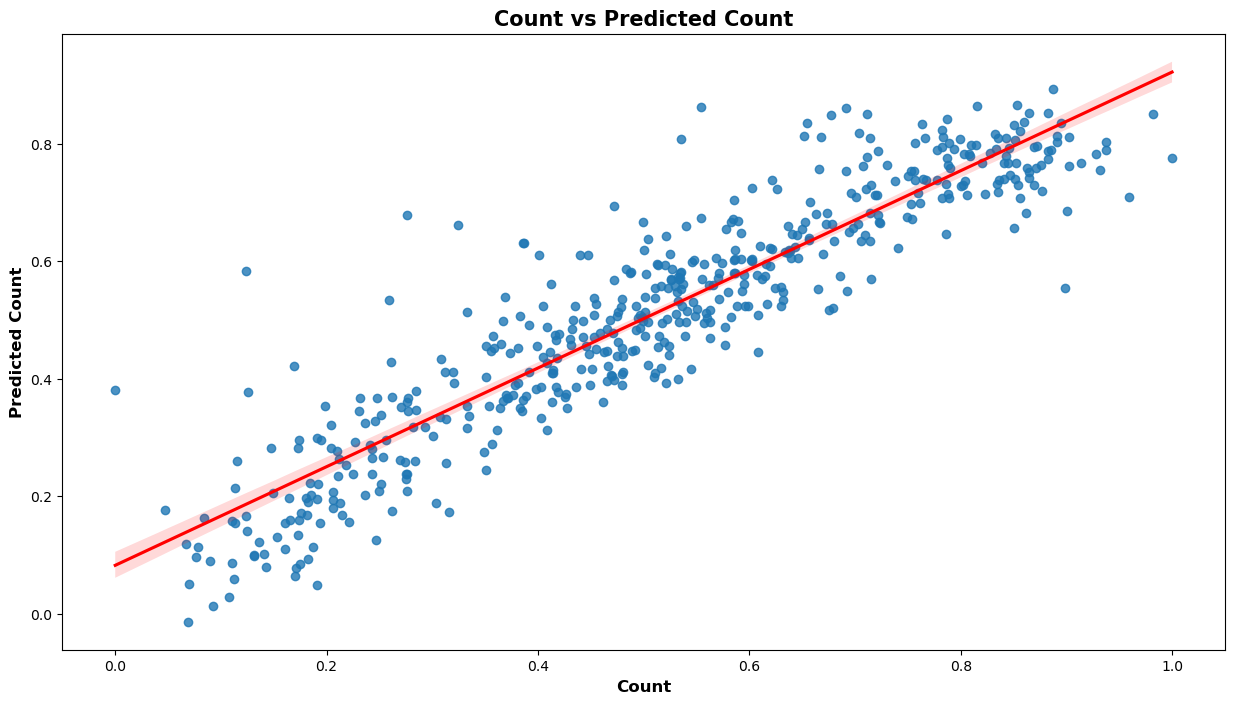

In [57]:
# plot the training set
plt.figure(figsize=(15,8))
sns.regplot(x = y_train, y = lr.predict(X_train_lm), line_kws={'color':'red'})
plt.xlabel('Count', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Predicted Count', fontsize=12, fontweight='bold', color='black')
plt.title('Count vs Predicted Count', fontsize=15, fontweight='bold', color='black')
plt.show()

# Inference:
1. The R-squared value is 0.839
2. The adjusted R-squared value is 0.835
3. The p-value of all the features is less than 0.05
4. The VIF value of all the features is less than 5
5. The F-statistic value is 198.9 which is greater than 1
6. Coefficients show that holiday, spring, lightrain, windspeed and mist are negatively correlated with the target variable
7. Coefficients show that temp, summer, winter, sep, year 2019 are positively correlated with the target variable

## Step 4: Residual Analysis of Train data

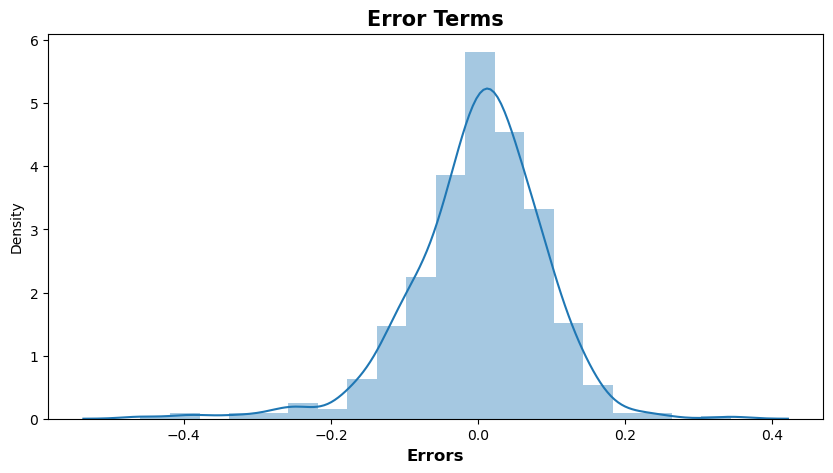

In [58]:
# residual analysis of the train data
y_train_pred = lr.predict(X_train_lm)
res = y_train - y_train_pred
plt.figure(figsize=(10,5))
sns.distplot(res, bins=20)
plt.title('Error Terms', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Errors', fontsize=12, fontweight='bold', color='black')
plt.show()
# Inference:
# 1. The residuals are normally distributed with mean 0.
# 2. The variance of the residuals is almost constant.
# 3. So, the assumption of normality and constant variance is satisfied.

In [59]:
(y_train-y_train_pred).mean()

-5.494515517948814e-16

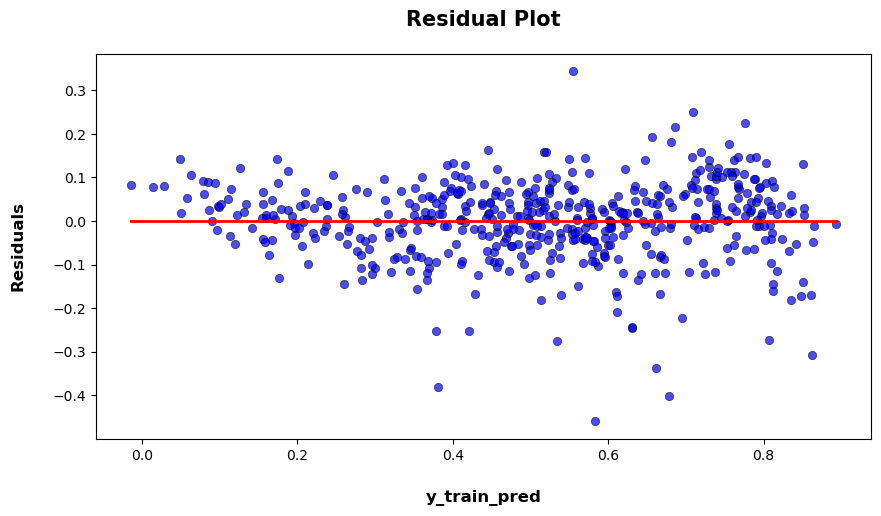

In [60]:
# look for patterns in residuals
plt.figure(figsize=(10,5))
sns.scatterplot(x = y_train_pred, y = res, linewidths=0.5, color='blue', alpha=0.7, edgecolor='black')
sns.lineplot(x = y_train_pred, y = 0, color='red', linewidth=2)
plt.title('Residual Plot', fontsize=15, fontweight='bold', pad=20, loc='center')
plt.xlabel('y_train_pred', fontsize=12, fontweight='bold', labelpad=20)
plt.ylabel('Residuals', fontsize=12, fontweight='bold', labelpad=20)
plt.show()

## Step 5: Predictions and evaluation on the test set

In [61]:
# Making predictions using the final model
# Applying the scaling on the test sets
num_vars = ['temp', 'humidity', 'windspeed', 'count','atemp']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
# Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test

In [63]:
# Creating X_test_lm dataframe by dropping variables from X_test
X_test_lm = X_test[X.columns]
# Adding a constant variable
X_test_lm = sm.add_constant(X_test_lm)
# Making predictions
y_pred = lr.predict(X_test_lm)

In [64]:
# calculating r2_score on the test set
r_squared=r2_score(y_test, y_pred)
r_squared 

0.8120252441934176

In [65]:
# adjusted r2_score on the test set
n = X_test_lm.shape[0]
p = X_test_lm.shape[1]-1
adjusted_r_squared = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r_squared

0.8001048938251953

### Inference:
1. **The R-squared value is 81.2% on the test set which is close to the R-squared value on the train set**
2. **The adjusted R-squared value is 80% on the test set which is close to the adjusted R-squared value on the train set**

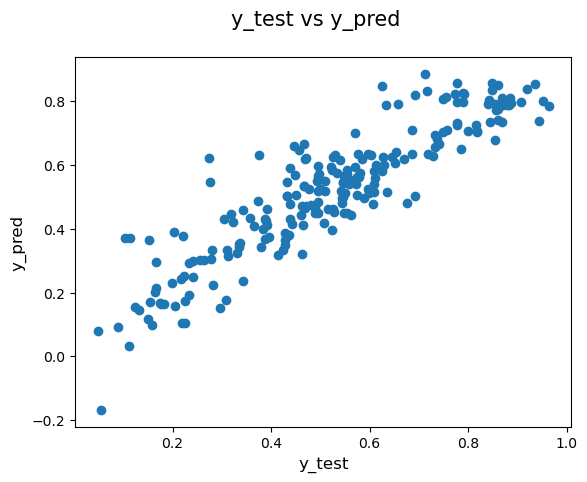

In [66]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.show()
# Inference:
# 1. The scatter plot is linear.
# 2. So, the model is good.
# 3. The model is able to explain 81% of the variance in the test set.

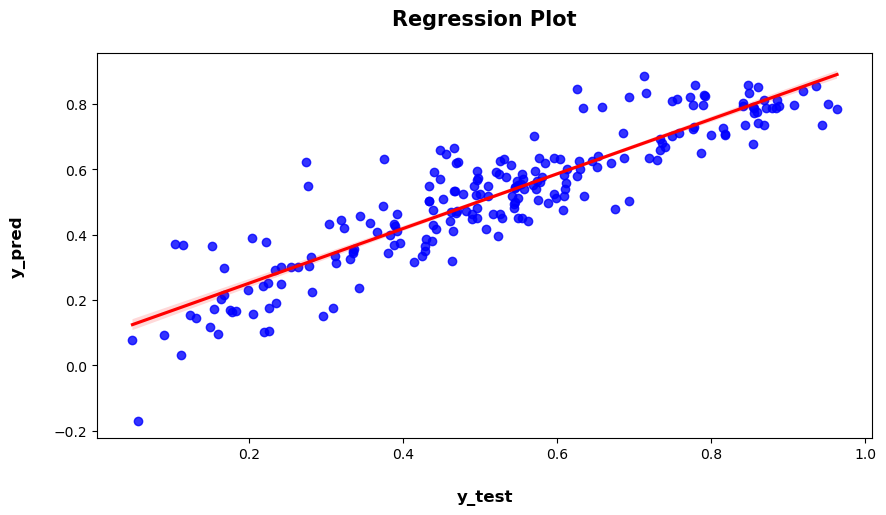

In [67]:
# regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Regression Plot', fontsize=15, fontweight='bold', pad=20, loc='center')
plt.xlabel('y_test', fontsize=12, fontweight='bold', labelpad=20)
plt.ylabel('y_pred', fontsize=12, fontweight='bold', labelpad=20)
plt.show()


In [68]:
lr.params
# Inference:
# top 3 features affecting the count are:
# 1. temp(positive correlation)
# 2. year 2019 (positive correlation)
# 3. light rain (negative correlation)

const         0.249360
temp          0.419689
windspeed    -0.160906
spring       -0.063428
summer        0.046930
winter        0.102192
2019          0.235166
dec          -0.048633
jan          -0.055163
nov          -0.051599
sep           0.075100
sun          -0.047833
light_rain   -0.295813
mist         -0.080542
dtype: float64

### **Inference:**
1. **The plot is linear**
2. So, the model is good.
3. The points are close to the regression line.
4. we can see that the regression line is a good fit to the data points.
5. **count=0.419689×temp+0.235166×year+0.046930×summer+0.102192×winter+0.075100xsep−0.295813×light_rain-0.160906xwindspeed-0.080542×mistcloudy-0.063428×spring-0.055163xjan-0.051599xnov-0.047833xsun**

## Analysis Comparison between Train model and Test:
- Train - R^2 : 0.839
- Train - Adjusted R^2 : 0.835
- Test - R^2: 0.812
- Test - Adjusted R^2: 0.80
- **Difference in R^2 between train and test: 2.7%**
- **Difference in adjusted R^2 between Train and test: 3.5%**
- **Since adusted R^2 is less than which is less than 5% difference in R62, we can conclude that it is the best model**

## Analysis on the problem:
- **We can see that temperature variable is having the highest coefficient 0.419689, which means if the temperature increases by one unit the number of bike rentals increases by 0.419689 units.**
- We also see there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
- We have spring, mist cloudy , light snow variables with negative coefficient. The coefficient value signifies how much of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

## Business Goals:
1. The company should focus on increasing the number of bikes when the temperature is high as the demand is high when the temperature is high.
2. The company should focus on increasing the number of bikes when the weather condition is clear as the demand is high when the weather condition is clear.
3. The company should focus on increasing the number of bikes when the windspeed is low as the demand is high when the windspeed is low.
4. The company should focus on increasing the number of bikes on sundays as the demand is high on sundays.